<a href="https://colab.research.google.com/github/noamgafni/STA160Project/blob/main/Chun_Lin_Lai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, we'll install the Kaggle library.

In [1]:
!pip install kaggle

Now, we'll create the necessary directory and copy the Kaggle API key into it.

In [3]:
import os
from google.colab import userdata

# Create the .kaggle directory if it doesn't exist
if not os.path.exists('/root/.kaggle'):
    os.makedirs('/root/.kaggle')

# Write the kaggle.json content to the file
with open('/root/.kaggle/kaggle.json', 'w') as f:
    kaggle_auth = userdata.get('KAGGLE_AUTH_JSON')
    f.write(kaggle_auth)

# Set the correct permissions for the file
os.chmod('/root/.kaggle/kaggle.json', 600)

Finally, we can download the dataset using the Kaggle API.

In [4]:
!kaggle datasets download -d isaaclopgu/cryptocurrency-historical-prices-top-100-2025

Dataset URL: https://www.kaggle.com/datasets/isaaclopgu/cryptocurrency-historical-prices-top-100-2025
License(s): CC-BY-SA-4.0
  0% 0.00/12.8M [00:00<?, ?B/s]
100% 12.8M/12.8M [00:00<00:00, 2.10GB/s]


After downloading, the dataset will be in a zip file. We'll need to unzip it.

In [5]:
import zipfile

zip_ref = zipfile.ZipFile('cryptocurrency-historical-prices-top-100-2025.zip', 'r')
zip_ref.extractall('.')
zip_ref.close()

Let's list the extracted files to see what we have.

In [6]:
!ls

cryptocurrency-historical-prices-top-100-2025.zip  sample_data
Crypto_historical_data.csv


In [7]:
import pandas as pd

# Load the historical data into a pandas DataFrame
df = pd.read_csv('Crypto_historical_data.csv')

# Display the first few rows and the info to get an overview of the data
display(df.head())
display(df.info())

,Date,Open,High,Low,Close,Volume,ticker,name
0,2017-11-09 00:00:00+00:00,1.01087,1.01327,0.996515,1.00818,358188000,USDT-USD,Tether
1,2017-11-10 00:00:00+00:00,1.00650,1.02423,0.995486,1.00601,756446016,USDT-USD,Tether
2,2017-11-11 00:00:00+00:00,1.00598,1.02621,0.995799,1.00899,746227968,USDT-USD,Tether
3,2017-11-12 00:00:00+00:00,1.00602,1.10591,0.967601,1.01247,1466060032,USDT-USD,Tether
4,2017-11-13 00:00:00+00:00,1.00448,1.02929,0.975103,1.00935,767884032,USDT-USD,Tether


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349722 entries, 0 to 349721
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    349722 non-null  object 
 1   Open    348200 non-null  float64
 2   High    348200 non-null  float64
 3   Low     348200 non-null  float64
 4   Close   349722 non-null  float64
 5   Volume  349722 non-null  int64  
 6   ticker  349722 non-null  object 
 7   name    349722 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 21.3+ MB


None

In [8]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the number of missing values per column
display("Missing values per column:")
display(missing_values)

'Missing values per column:'

,0
Date,0
Open,1522
High,1522
Low,1522
Close,0
Volume,0
ticker,0
name,0


In [9]:
# Remove rows with any missing values
df_cleaned = df.dropna()

# Display the info of the cleaned DataFrame to see the new number of rows
display("Info after dropping rows with missing values:")
display(df_cleaned.info())

# Verify that there are no more missing values
display("Missing values after dropping rows:")
display(df_cleaned.isnull().sum())

'Info after dropping rows with missing values:'

<class 'pandas.core.frame.DataFrame'>
Index: 348200 entries, 0 to 349721
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    348200 non-null  object 
 1   Open    348200 non-null  float64
 2   High    348200 non-null  float64
 3   Low     348200 non-null  float64
 4   Close   348200 non-null  float64
 5   Volume  348200 non-null  int64  
 6   ticker  348200 non-null  object 
 7   name    348200 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 23.9+ MB


None

'Missing values after dropping rows:'

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
ticker,0
name,0


In [12]:
# Convert 'Date' column to datetime objects
df_cleaned = df_cleaned.copy() # Create a copy to avoid SettingWithCopyWarning
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Display the info of the DataFrame to confirm the data type change
display("Info after converting 'Date' column to datetime:")
display(df_cleaned.info())

"Info after converting 'Date' column to datetime:"

<class 'pandas.core.frame.DataFrame'>
Index: 348200 entries, 0 to 349721
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype              
---  ------  --------------   -----              
 0   Date    348200 non-null  datetime64[ns, UTC]
 1   Open    348200 non-null  float64            
 2   High    348200 non-null  float64            
 3   Low     348200 non-null  float64            
 4   Close   348200 non-null  float64            
 5   Volume  348200 non-null  int64              
 6   ticker  348200 non-null  object             
 7   name    348200 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(2)
memory usage: 23.9+ MB


None

In [15]:
# Calculate the 5th percentile of the 'Log Returns'
tail_risk_threshold = df_cleaned['Log Returns'].quantile(0.05)

# Define the tail-risk label (1 if log return is below the threshold, 0 otherwise)
# We use .shift(-1) to predict tomorrow's tail risk
df_cleaned['Tail_Risk_Tomorrow'] = (df_cleaned['Log Returns'].shift(-1) < tail_risk_threshold).astype(int)

# Define the VaR-style downside target (the 5th percentile value)
df_cleaned['VaR_Downside_Target'] = tail_risk_threshold

# Display the first few rows with the new columns and the calculated threshold
display(f"Tail risk threshold (5th percentile of Log Returns): {tail_risk_threshold:.4f}")
display("DataFrame with 'Tail_Risk_Tomorrow' and 'VaR_Downside_Target' columns:")
display(df_cleaned.head())

'Tail risk threshold (5th percentile of Log Returns): -0.0928'

"DataFrame with 'Tail_Risk_Tomorrow' and 'VaR_Downside_Target' columns:"

,Date,Open,High,Low,Close,Volume,ticker,name,Log Returns,Tail_Risk_Tomorrow,VaR_Downside_Target
0,2017-11-09 00:00:00+00:00,1.01087,1.01327,0.996515,1.00818,358188000,USDT-USD,Tether,NaN,0,-0.092848
1,2017-11-10 00:00:00+00:00,1.00650,1.02423,0.995486,1.00601,756446016,USDT-USD,Tether,-0.002155,0,-0.092848
2,2017-11-11 00:00:00+00:00,1.00598,1.02621,0.995799,1.00899,746227968,USDT-USD,Tether,0.002958,0,-0.092848
3,2017-11-12 00:00:00+00:00,1.00602,1.10591,0.967601,1.01247,1466060032,USDT-USD,Tether,0.003443,0,-0.092848
4,2017-11-13 00:00:00+00:00,1.00448,1.02929,0.975103,1.00935,767884032,USDT-USD,Tether,-0.003086,0,-0.092848


In [17]:
# Calculate rolling standard deviation of log returns as a volatility feature
window_size = 14 # 14-day rolling window

# Calculate the rolling standard deviation
df_cleaned['Rolling_Volatility'] = df_cleaned['Log Returns'].rolling(window=window_size).std()

# Display the first few rows with the new 'Rolling_Volatility' column
display(f"DataFrame with {window_size}-day Rolling Volatility:")
display(df_cleaned.head(window_size + 5)) # Display enough rows to see some non-NaN values

'DataFrame with 14-day Rolling Volatility:'

,Date,Open,High,Low,Close,Volume,ticker,name,Log Returns,Tail_Risk_Tomorrow,VaR_Downside_Target,Rolling_Volatility
0,2017-11-09 00:00:00+00:00,1.010870,1.01327,0.996515,1.008180,358188000,USDT-USD,Tether,NaN,0,-0.092848,NaN
1,2017-11-10 00:00:00+00:00,1.006500,1.02423,0.995486,1.006010,756446016,USDT-USD,Tether,-0.002155,0,-0.092848,NaN
2,2017-11-11 00:00:00+00:00,1.005980,1.02621,0.995799,1.008990,746227968,USDT-USD,Tether,0.002958,0,-0.092848,NaN
3,2017-11-12 00:00:00+00:00,1.006020,1.10591,0.967601,1.012470,1466060032,USDT-USD,Tether,0.003443,0,-0.092848,NaN
4,2017-11-13 00:00:00+00:00,1.004480,1.02929,0.975103,1.009350,767884032,USDT-USD,Tether,-0.003086,0,-0.092848,NaN
5,2017-11-14 00:00:00+00:00,1.005240,1.01343,0.996898,1.006830,429857984,USDT-USD,Tether,-0.002500,0,-0.092848,NaN
6,2017-11-15 00:00:00+00:00,1.004580,1.01163,1.000250,1.003180,449671008,USDT-USD,Tether,-0.003632,0,-0.092848,NaN
7,2017-11-16 00:00:00+00:00,1.005820,1.01089,0.993232,1.002120,650278976,USDT-USD,Tether,-0.001057,0,-0.092848,NaN
8,2017-11-17 00:00:00+00:00,0.995758,1.01181,0.995758,1.001390,639398016,USDT-USD,Tether,-0.000729,0,-0.092848,NaN
9,2017-11-18 00:00:00+00:00,1.000650,1.00918,0.996340,1.002310,588136000,USDT-USD,Tether,0.000918,0,-0.092848,NaN


In [19]:
# --- Technical Features ---

# Simple Moving Average (SMA)
# We'll use a 20-day SMA as an example
window_size_sma = 20
df_cleaned['SMA_' + str(window_size_sma)] = df_cleaned['Close'].rolling(window=window_size_sma).mean()

# --- Momentum Features ---

# Rate of Change (ROC)
# We'll calculate the 10-day ROC
window_size_roc = 10
df_cleaned['ROC_' + str(window_size_roc)] = df_cleaned['Close'].pct_change(periods=window_size_roc) * 100

# --- Volume Features ---

# Volume Moving Average
# We'll use a 20-day Volume Moving Average as an example
window_size_vol_sma = 20
df_cleaned['Volume_SMA_' + str(window_size_vol_sma)] = df_cleaned['Volume'].rolling(window=window_size_vol_sma).mean()

# Display the first few rows with the new features
display("DataFrame with added Technical, Momentum, and Volume Features:")
display(df_cleaned.head(window_size_sma + 5)) # Display enough rows to see some non-NaN values from SMA

'DataFrame with added Technical, Momentum, and Volume Features:'

,Date,Open,High,Low,Close,Volume,ticker,name,Log Returns,Tail_Risk_Tomorrow,VaR_Downside_Target,Rolling_Volatility,SMA_20,ROC_10,Volume_SMA_20
0,2017-11-09 00:00:00+00:00,1.010870,1.01327,0.996515,1.008180,358188000,USDT-USD,Tether,NaN,0,-0.092848,NaN,NaN,NaN,NaN
1,2017-11-10 00:00:00+00:00,1.006500,1.02423,0.995486,1.006010,756446016,USDT-USD,Tether,-0.002155,0,-0.092848,NaN,NaN,NaN,NaN
2,2017-11-11 00:00:00+00:00,1.005980,1.02621,0.995799,1.008990,746227968,USDT-USD,Tether,0.002958,0,-0.092848,NaN,NaN,NaN,NaN
3,2017-11-12 00:00:00+00:00,1.006020,1.10591,0.967601,1.012470,1466060032,USDT-USD,Tether,0.003443,0,-0.092848,NaN,NaN,NaN,NaN
4,2017-11-13 00:00:00+00:00,1.004480,1.02929,0.975103,1.009350,767884032,USDT-USD,Tether,-0.003086,0,-0.092848,NaN,NaN,NaN,NaN
5,2017-11-14 00:00:00+00:00,1.005240,1.01343,0.996898,1.006830,429857984,USDT-USD,Tether,-0.002500,0,-0.092848,NaN,NaN,NaN,NaN
6,2017-11-15 00:00:00+00:00,1.004580,1.01163,1.000250,1.003180,449671008,USDT-USD,Tether,-0.003632,0,-0.092848,NaN,NaN,NaN,NaN
7,2017-11-16 00:00:00+00:00,1.005820,1.01089,0.993232,1.002120,650278976,USDT-USD,Tether,-0.001057,0,-0.092848,NaN,NaN,NaN,NaN
8,2017-11-17 00:00:00+00:00,0.995758,1.01181,0.995758,1.001390,639398016,USDT-USD,Tether,-0.000729,0,-0.092848,NaN,NaN,NaN,NaN
9,2017-11-18 00:00:00+00:00,1.000650,1.00918,0.996340,1.002310,588136000,USDT-USD,Tether,0.000918,0,-0.092848,NaN,NaN,NaN,NaN


In [21]:
# Drop rows with NaN values that were introduced by rolling calculations
# This ensures we only train and validate on rows with complete feature data
df_processed = df_cleaned.dropna().copy()

# Display the info and head of the processed DataFrame
display("DataFrame after dropping rows with NaNs from feature engineering:")
display(df_processed.info())
display(df_processed.head())

'DataFrame after dropping rows with NaNs from feature engineering:'

<class 'pandas.core.frame.DataFrame'>
Index: 348181 entries, 19 to 349721
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   Date                 348181 non-null  datetime64[ns, UTC]
 1   Open                 348181 non-null  float64            
 2   High                 348181 non-null  float64            
 3   Low                  348181 non-null  float64            
 4   Close                348181 non-null  float64            
 5   Volume               348181 non-null  int64              
 6   ticker               348181 non-null  object             
 7   name                 348181 non-null  object             
 8   Log Returns          348181 non-null  float64            
 9   Tail_Risk_Tomorrow   348181 non-null  int64              
 10  VaR_Downside_Target  348181 non-null  float64            
 11  Rolling_Volatility   348181 non-null  float64            
 12  SMA_20

None

,Date,Open,High,Low,Close,Volume,ticker,name,Log Returns,Tail_Risk_Tomorrow,VaR_Downside_Target,Rolling_Volatility,SMA_20,ROC_10,Volume_SMA_20
19,2017-11-28 00:00:00+00:00,1.00287,1.00648,0.996048,1.000140,794764032,USDT-USD,Tether,-0.001149,0,-0.092848,0.004203,1.003693,-0.216508,668105449.6
20,2017-11-29 00:00:00+00:00,1.00013,1.04845,0.955618,0.990606,1672120064,USDT-USD,Tether,-0.009578,0,-0.092848,0.004804,1.002815,-1.180516,733802052.8
21,2017-11-30 00:00:00+00:00,1.00386,1.02867,0.989319,1.008100,1043969984,USDT-USD,Tether,0.017506,0,-0.092848,0.006874,1.002919,0.616821,748178251.2
22,2017-12-01 00:00:00+00:00,1.00720,1.01921,0.993043,1.009780,749395968,USDT-USD,Tether,0.001665,0,-0.092848,0.006873,1.002959,1.378753,748336651.2
23,2017-12-02 00:00:00+00:00,1.00895,1.01677,0.995611,0.999654,679950016,USDT-USD,Tether,-0.010079,0,-0.092848,0.007438,1.002318,-0.049590,709031150.4


Starting walk-forward validation...
Training on data up to 2022-11-05 (size: 243726)
Validating on data from 2022-11-06 to 2025-11-09 (size: 104455)
------------------------------
Walk-forward validation finished.

Overall Evaluation on Validation Data:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     98189
           1       0.84      0.06      0.12      6266

    accuracy                           0.94    104455
   macro avg       0.89      0.53      0.55    104455
weighted avg       0.94      0.94      0.92    104455

Overall ROC AUC: 0.7601


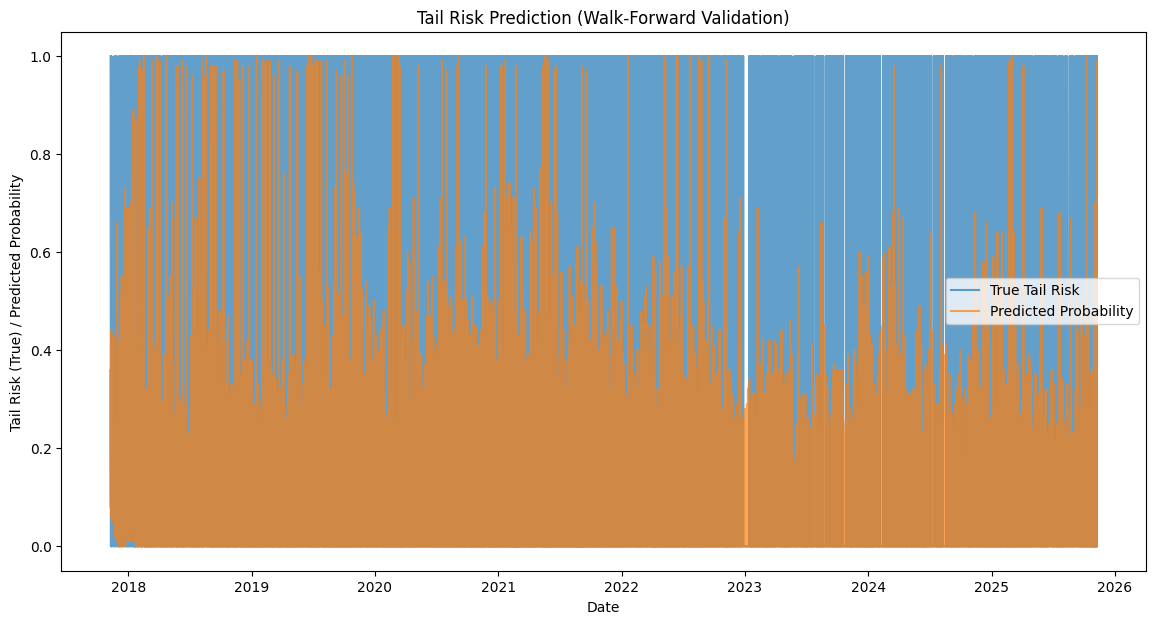

'\nAverage Feature Importance Across Walk-Forward Folds:'

,0
Rolling_Volatility,0.259811
ROC_10,0.140120
Volume,0.099318
Volume_SMA_20,0.099166
Low,0.087430
SMA_20,0.079466
Close,0.079348
Open,0.079140
High,0.076201


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported if not already

# Define the walk-forward parameters
# We've already defined the initial train_size
validation_size = len(validation_data) # Use the rest of the data for validation initially
step_size = int(len(df_processed) * 0.1) # Define a step size for the walk-forward window (e.g., 10% of total data)

# Initialize lists to store results and feature importances
predictions = []
true_labels = []
dates = []
feature_importances = [] # List to store feature importances from each fold

# Implement walk-forward validation
print("Starting walk-forward validation...")

# Start the loop from the end of the initial training set
for i in range(train_size, len(df_processed) - validation_size + 1, step_size):
    # Define the training and validation periods
    train_end = i
    validation_end = i + validation_size

    train_fold = df_processed.iloc[:train_end]
    validation_fold = df_processed.iloc[train_end:validation_end]

    if len(validation_fold) == 0:
        print(f"No validation data for window starting at index {train_end}. Stopping.")
        break

    X_train_fold, y_train_fold = train_fold[feature_columns], train_fold['Tail_Risk_Tomorrow']
    X_validation_fold, y_validation_fold = validation_fold[feature_columns], validation_fold['Tail_Risk_Tomorrow']

    print(f"Training on data up to {train_fold.index[-1].date()} (size: {len(train_fold)})")
    print(f"Validating on data from {validation_fold.index[0].date()} to {validation_fold.index[-1].date()} (size: {len(validation_fold)})")

    # Initialize and train the RandomForestClassifier
    model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced') # Added class_weight for imbalanced data
    model.fit(X_train_fold, y_train_fold)

    # Store feature importances
    feature_importances.append(model.feature_importances_)

    # Predict probabilities on the validation set
    y_pred_proba = model.predict_proba(X_validation_fold)[:, 1]

    # Store the results
    predictions.extend(y_pred_proba)
    true_labels.extend(y_validation_fold)
    dates.extend(validation_fold.index)

    print("-" * 30)

print("Walk-forward validation finished.")

# Create a DataFrame for the results
results_df = pd.DataFrame({'Date': dates, 'True_Label': true_labels, 'Predicted_Prob': predictions})
results_df = results_df.set_index('Date')
results_df.sort_index(inplace=True) # Sort by date

# Evaluate the overall performance on the validation data
# We'll use a threshold to convert probabilities to binary predictions for classification report
threshold = 0.5 # Example threshold
y_pred_binary = (results_df['Predicted_Prob'] >= threshold).astype(int)

print("\nOverall Evaluation on Validation Data:")
print(classification_report(results_df['True_Label'], y_pred_binary))
print(f"Overall ROC AUC: {roc_auc_score(results_df['True_Label'], results_df['Predicted_Prob']):.4f}")

# Example of visualizing predictions vs true labels over time (optional)
plt.figure(figsize=(14, 7))
plt.plot(results_df.index, results_df['True_Label'], label='True Tail Risk', alpha=0.7)
plt.plot(results_df.index, results_df['Predicted_Prob'], label='Predicted Probability', alpha=0.7)
plt.title('Tail Risk Prediction (Walk-Forward Validation)')
plt.xlabel('Date')
plt.ylabel('Tail Risk (True) / Predicted Probability')
plt.legend()
plt.show()

# Convert collected feature importances to a DataFrame for easier analysis
feature_importance_df = pd.DataFrame(feature_importances, columns=feature_columns)

# Display the average feature importance across all folds
display("\nAverage Feature Importance Across Walk-Forward Folds:")
display(feature_importance_df.mean().sort_values(ascending=False))


Starting walk-forward validation for Quantile Model...
Training Quantile Model on data up to 2022-11-05 (size: 243726)
Validating Quantile Model on data from 2022-11-06 to 2025-11-09 (size: 104455)
------------------------------
Walk-forward validation for Quantile Model finished.


'\nEvaluation of Quantile Model (Target Quantile: 0.05):'

'Percentage of actual log returns below predicted quantile: 49.27%'

'Actual 5th percentile of log returns in validation data: -0.1036'

'Average predicted 5th percentile: 0.0006'

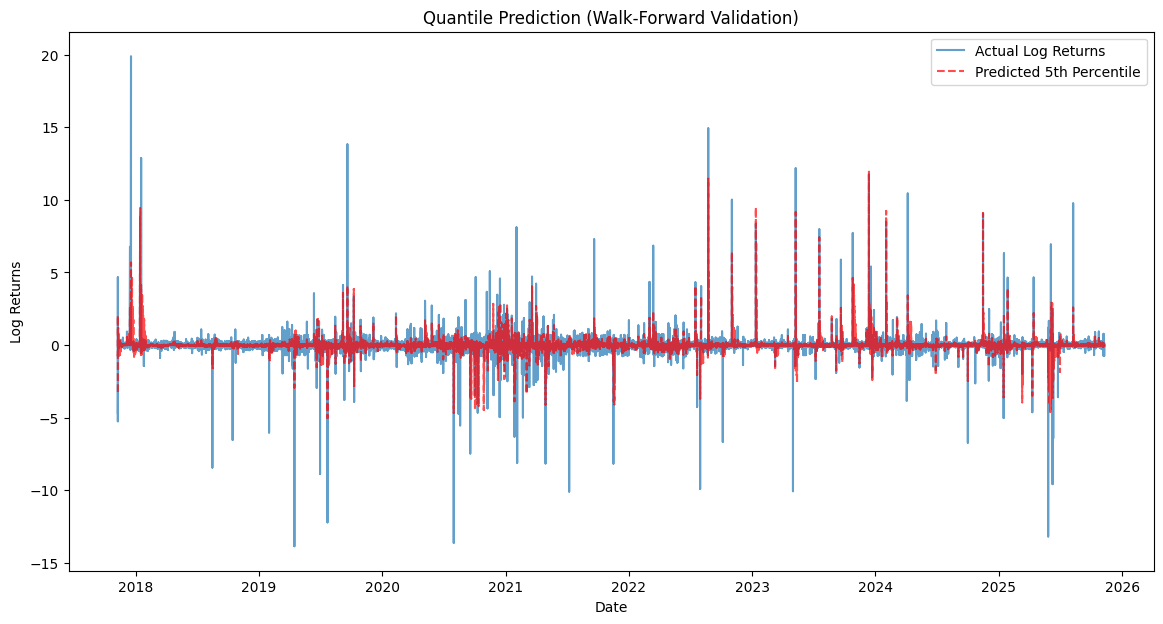

In [27]:
from sklearn.ensemble import HistGradientBoostingRegressor
import numpy as np

# Define the quantile (5th percentile)
quantile_level = 0.05

# Initialize lists to store quantile predictions and actual log returns for evaluation
quantile_predictions = []
actual_log_returns = [] # List to store actual log returns from validation folds
dates_quantile = [] # List to store dates for quantile predictions

print("\nStarting walk-forward validation for Quantile Model...")

# Implement walk-forward validation for the quantile model
# Use the same walk-forward setup as before
for i in range(train_size, len(df_processed) - validation_size + 1, step_size):
    # Define the training and validation periods
    train_end = i
    validation_end = i + validation_size

    train_fold = df_processed.iloc[:train_end]
    validation_fold = df_processed.iloc[train_end:validation_end]

    if len(validation_fold) == 0:
        print(f"No validation data for window starting at index {train_end}. Stopping.")
        break

    X_train_fold, y_train_quantile_fold = train_fold[feature_columns], train_fold['Log Returns'] # Predict actual log returns for quantile model
    X_validation_fold, y_validation_quantile_fold = validation_fold[feature_columns], validation_fold['Log Returns']

    print(f"Training Quantile Model on data up to {train_fold.index[-1].date()} (size: {len(train_fold)})")
    print(f"Validating Quantile Model on data from {validation_fold.index[0].date()} to {validation_fold.index[-1].date()} (size: {len(validation_fold)})")

    # Initialize and train the Quantile Regressor
    # HistGradientBoostingRegressor supports quantile loss
    quantile_model = HistGradientBoostingRegressor(quantile=quantile_level, random_state=42)
    quantile_model.fit(X_train_fold, y_train_quantile_fold)

    # Predict the quantile on the validation set
    y_pred_quantile = quantile_model.predict(X_validation_fold)

    # Store the results and actual log returns
    quantile_predictions.extend(y_pred_quantile)
    actual_log_returns.extend(y_validation_quantile_fold) # Store actual log returns
    dates_quantile.extend(validation_fold.index) # Store dates for quantile predictions

    print("-" * 30)

print("Walk-forward validation for Quantile Model finished.")

# Create a DataFrame for the quantile model results
quantile_results_df = pd.DataFrame({
    'Date': dates_quantile,
    'Actual_Log_Returns': actual_log_returns,
    'Predicted_Quantile': quantile_predictions
})
quantile_results_df = quantile_results_df.set_index('Date')
quantile_results_df.sort_index(inplace=True) # Sort by date

# Evaluate the quantile model
# Check the percentage of actual log returns below the predicted quantile
percentage_below_predicted_quantile = (quantile_results_df['Actual_Log_Returns'] < quantile_results_df['Predicted_Quantile']).mean() * 100

display(f"\nEvaluation of Quantile Model (Target Quantile: {quantile_level}):")
display(f"Percentage of actual log returns below predicted quantile: {percentage_below_predicted_quantile:.2f}%")

# We can also compare the predicted quantile to the actual 5th percentile of log returns in the validation set
actual_5th_percentile_validation = quantile_results_df['Actual_Log_Returns'].quantile(quantile_level)
display(f"Actual {quantile_level*100:.0f}th percentile of log returns in validation data: {actual_5th_percentile_validation:.4f}")
display(f"Average predicted {quantile_level*100:.0f}th percentile: {quantile_results_df['Predicted_Quantile'].mean():.4f}")

# Visualize predicted quantile vs actual log returns over time (optional)
plt.figure(figsize=(14, 7))
plt.plot(quantile_results_df.index, quantile_results_df['Actual_Log_Returns'], label='Actual Log Returns', alpha=0.7)
plt.plot(quantile_results_df.index, quantile_results_df['Predicted_Quantile'], label=f'Predicted {quantile_level*100:.0f}th Percentile', alpha=0.7, color='red', linestyle='--')
plt.title('Quantile Prediction (Walk-Forward Validation)')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.show()


Starting walk-forward validation for Logistic Regression Baseline...
Training Logistic Regression on data up to 2022-11-05 (size: 243726)
Validating Logistic Regression on data from 2022-11-06 to 2025-11-09 (size: 104455)
------------------------------
Walk-forward validation for Logistic Regression Baseline finished.

Overall Evaluation of Logistic Regression Baseline on Validation Data:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     98189
           1       0.04      0.01      0.01      6266

    accuracy                           0.93    104455
   macro avg       0.49      0.50      0.49    104455
weighted avg       0.89      0.93      0.91    104455

Overall ROC AUC (Logistic Regression): 0.5650


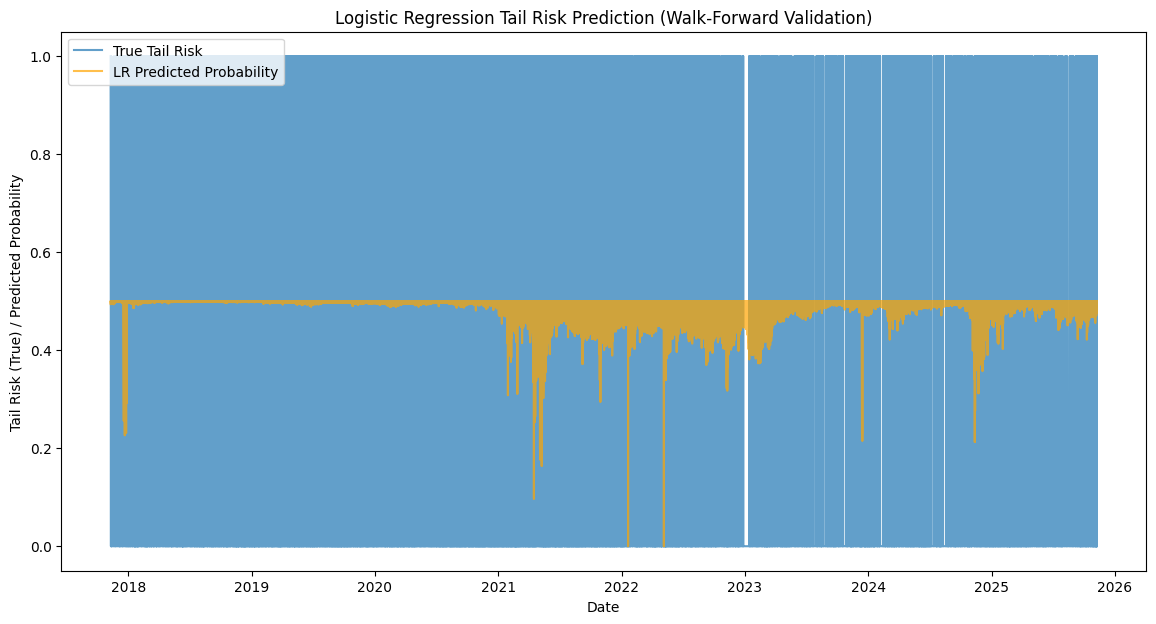

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported

# Initialize lists to store results for Logistic Regression
lr_predictions = []
lr_true_labels = []
lr_dates = []

print("\nStarting walk-forward validation for Logistic Regression Baseline...")

# Implement walk-forward validation for Logistic Regression
# Use the same walk-forward setup as before
for i in range(train_size, len(df_processed) - validation_size + 1, step_size):
    # Define the training and validation periods
    train_end = i
    validation_end = i + validation_size

    train_fold = df_processed.iloc[:train_end]
    validation_fold = df_processed.iloc[train_end:validation_end]

    if len(validation_fold) == 0:
        print(f"No validation data for window starting at index {train_end}. Stopping.")
        break

    X_train_fold, y_train_fold = train_fold[feature_columns], train_fold['Tail_Risk_Tomorrow']
    X_validation_fold, y_validation_fold = validation_fold[feature_columns], validation_fold['Tail_Risk_Tomorrow']

    print(f"Training Logistic Regression on data up to {train_fold.index[-1].date()} (size: {len(train_fold)})")
    print(f"Validating Logistic Regression on data from {validation_fold.index[0].date()} to {validation_fold.index[-1].date()} (size: {len(validation_fold)})")

    # Initialize and train the Logistic Regression model
    # Use class_weight='balanced' due to potential class imbalance
    lr_model = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced')
    lr_model.fit(X_train_fold, y_train_fold)

    # Predict probabilities on the validation set
    lr_y_pred_proba = lr_model.predict_proba(X_validation_fold)[:, 1]

    # Store the results
    lr_predictions.extend(lr_y_pred_proba)
    lr_true_labels.extend(y_validation_fold)
    lr_dates.extend(validation_fold.index)

    print("-" * 30)

print("Walk-forward validation for Logistic Regression Baseline finished.")

# Create a DataFrame for the Logistic Regression results
lr_results_df = pd.DataFrame({'Date': lr_dates, 'True_Label': lr_true_labels, 'Predicted_Prob': lr_predictions})
lr_results_df = lr_results_df.set_index('Date')
lr_results_df.sort_index(inplace=True) # Sort by date

# Evaluate the overall performance on the validation data
# Use the same threshold as before for comparison
threshold = 0.5
lr_y_pred_binary = (lr_results_df['Predicted_Prob'] >= threshold).astype(int)

print("\nOverall Evaluation of Logistic Regression Baseline on Validation Data:")
print(classification_report(lr_results_df['True_Label'], lr_y_pred_binary))
print(f"Overall ROC AUC (Logistic Regression): {roc_auc_score(lr_results_df['True_Label'], lr_results_df['Predicted_Prob']):.4f}")

# Optional: Visualize Logistic Regression predictions vs true labels
plt.figure(figsize=(14, 7))
plt.plot(lr_results_df.index, lr_results_df['True_Label'], label='True Tail Risk', alpha=0.7)
plt.plot(lr_results_df.index, lr_results_df['Predicted_Prob'], label='LR Predicted Probability', alpha=0.7, color='orange')
plt.title('Logistic Regression Tail Risk Prediction (Walk-Forward Validation)')
plt.xlabel('Date')
plt.ylabel('Tail Risk (True) / Predicted Probability')
plt.legend()
plt.show()

In [22]:
# Define features (X) and target (y)
# We'll use the engineered features and the 'Close' price as features
feature_columns = [col for col in df_processed.columns if col not in ['Date', 'Log Returns', 'Tail_Risk_Tomorrow', 'VaR_Downside_Target', 'ticker', 'name']]
X = df_processed[feature_columns]
y = df_processed['Tail_Risk_Tomorrow']

# Set the 'Date' column as the index for easier time-based splitting
df_processed = df_processed.set_index('Date')

# Define the initial training period and validation period
# We'll use the first 70% of the data for initial training and the next 30% for initial validation
train_size = int(len(df_processed) * 0.7)
train_data, validation_data = df_processed.iloc[:train_size], df_processed.iloc[train_size:]

X_train, y_train = train_data[feature_columns], train_data['Tail_Risk_Tomorrow']
X_validation, y_validation = validation_data[feature_columns], validation_data['Tail_Risk_Tomorrow']

display("Shape of training features:", X_train.shape)
display("Shape of training target:", y_train.shape)
display("Shape of validation features:", X_validation.shape)
display("Shape of validation target:", y_validation.shape)

'Shape of training features:'

(243726, 9)

'Shape of training target:'

(243726,)

'Shape of validation features:'

(104455, 9)

'Shape of validation target:'

(104455,)

In [13]:
import numpy as np

# Compute log returns from the 'Close' price
# We use .shift(1) to compare each day's closing price with the previous day's closing price
df_cleaned['Log Returns'] = np.log(df_cleaned['Close'] / df_cleaned['Close'].shift(1))

# Display the first few rows with the new 'Log Returns' column
display("DataFrame with 'Log Returns' column:")
display(df_cleaned.head())

"DataFrame with 'Log Returns' column:"

,Date,Open,High,Low,Close,Volume,ticker,name,Log Returns
0,2017-11-09 00:00:00+00:00,1.01087,1.01327,0.996515,1.00818,358188000,USDT-USD,Tether,NaN
1,2017-11-10 00:00:00+00:00,1.00650,1.02423,0.995486,1.00601,756446016,USDT-USD,Tether,-0.002155
2,2017-11-11 00:00:00+00:00,1.00598,1.02621,0.995799,1.00899,746227968,USDT-USD,Tether,0.002958
3,2017-11-12 00:00:00+00:00,1.00602,1.10591,0.967601,1.01247,1466060032,USDT-USD,Tether,0.003443
4,2017-11-13 00:00:00+00:00,1.00448,1.02929,0.975103,1.00935,767884032,USDT-USD,Tether,-0.003086
